## Final Project Submission

Please fill out:
* Student name: Michelle Mayoga Nyaanga
* Student pace: Full time 
* Scheduled project review date/time: 22/03/24
* Instructor name: Nikita Njoroge
* Blog post URL:


In [162]:
# Your code here - remember to use markdown cells for comments as well!

# Business Understanding

By analyzing historical box office data and current content trends, this project aims to provide Microsoft's new movie studio with data-driven insights to navigate the film industry. This project empowers Microsoft to make informed decisions and establish a competitive position within the film industry.

# Data Understanding
There were various sources of data which include:
Box Office Mojo,
IMDB, 
Rotten Tomatoes,
TheMovieDB and
The Numbers. However, focus was mainly on the Box Office, The numbers and TheMovieDB datasets.
The datasets contain columns and key variables helpful to our analysis;Movie title,original language,domestic gross,worlwide gross,popularity and production budget.

# Importing the right packages
We import the right packages in data science to access specialized functionalities and ensure efficient, maintainable code.

In [163]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Load and review datatype and dataset
To access and analyze information for insights and to transform data into features for modeling and exploration.

In [165]:
movies_budget = pd.read_csv('Data/tn.movie_budgets.csv')
movies_gross = pd.read_csv('Data/bom.movie_gross.csv')
tmd = pd.read_csv('Data/tmdb.movies.csv',index_col=0)
reviews = pd.read_csv('Data/rt.reviews.tsv', delimiter='\t',encoding='unicode_escape')
movie_info = pd.read_csv('Data/rt.movie_info.tsv', delimiter ='\t', encoding='unicode_escape' )

In [166]:
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [167]:
movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [168]:
tmd.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [169]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [170]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Clean dataset
To ensure data accuracy, for instance removing errors and to improve analysis results which will lead to better decisions.

# The Numbers Dataset

In [171]:
# checking for duplicates
movies_budget.duplicated().value_counts()

False    5782
Name: count, dtype: int64

In [172]:
clean_and_convert = ["production_budget","domestic_gross","worldwide_gross"]

In [173]:
movies_budget["release_date"] = pd.to_datetime(movies_budget["release_date"])

In [174]:
# dropping unnecessary columns
cols_to_drop = ["release_date", "id"]
cols =[ col for col in movies_budget if col not in cols_to_drop]
movies_budget = movies_budget[cols]
movies_budget

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


# BOM Dataset

In [175]:
# checking for missing values
missing_values = movies_gross.isnull().sum()
missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [176]:
# dropping null values
movies_gross = movies_gross.dropna(subset = ["studio"])
movies_gross.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [177]:
# dropping unnecessary columns
cols_to_drop = ["domestic_gross","foreign_gross","year"]
cols = [col for col in movies_gross.columns if col not in cols_to_drop]
movies_gross = movies_gross[cols]
movies_gross

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


# TMDB Dataset

In [178]:
# checking for duplicates
tmd.duplicated().value_counts()

False    25497
True      1020
Name: count, dtype: int64

In [179]:
# dropping duplicates
tmd = tmd.drop_duplicates()
tmd.duplicated().value_counts()

False    25497
Name: count, dtype: int64

In [180]:
tmd.loc[:,"release_date"] = pd.to_datetime(tmd["release_date"])

In [181]:
# dropping unnecessary columns
cols_to_drop = ["id","release_date","original_title"]
cols = [col for col in tmd if col not in cols_to_drop]
tmdb_df = tmd[cols]
tmdb_df

,genre_ids,original_language,popularity,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,Inception,8.3,22186
...,...,...,...,...,...,...
26512,"[27, 18]",en,0.600,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,0.600,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,0.600,The Last One,0.0,1
26515,"[10751, 12, 28]",en,0.600,Trailer Made,0.0,1


# Merging Tables

In [182]:
# merging tables
merged_bomtmd = pd.merge(movies_gross ,tmdb_df,left_on = "title",right_on = "title",how = "inner")
merged_bomtmd

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368
...,...,...,...,...,...,...,...
2450,The Escape,IFC,"[53, 28]",en,0.600,7.0,1
2451,The Escape,IFC,"[53, 28]",en,1.176,6.6,10
2452,Souvenir,Strand,"[35, 18]",fr,2.130,5.8,14
2453,The Quake,Magn.,[12],no,11.051,6.7,81


In [183]:
merged_bomtmd= pd.merge(merged_bomtmd,movies_budget,left_on = "title",right_on = "movie",how = "inner")
merged_bomtmd

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,Gotti,"$10,000,000","$4,286,367","$6,089,100"
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1267,Mandy,RLJ,[18],en,0.600,3.5,2,Mandy,"$6,000,000","$1,214,525","$1,427,656"
1268,Mandy,RLJ,"[28, 53, 27, 14, 9648]",en,16.240,6.2,618,Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [184]:
# dropping columns
cols_to_drop = ["movie_y", "production_budget_y","domestic_gross_y","worldwide_gross_y","movie_x","production_budget_x","domestic_gross_x","worldwide_gross_x"]
cols =[ col for col in merged_bomtmd if col not in cols_to_drop]
merged_bomtmd = merged_bomtmd[cols]
merged_bomtmd

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,Gotti,"$10,000,000","$4,286,367","$6,089,100"
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1267,Mandy,RLJ,[18],en,0.600,3.5,2,Mandy,"$6,000,000","$1,214,525","$1,427,656"
1268,Mandy,RLJ,"[28, 53, 27, 14, 9648]",en,16.240,6.2,618,Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [185]:
merged_bomtmd.drop_duplicates(inplace = True)

In [186]:
# checking for duplicates in title 
merged_bomtmd["title"].duplicated().value_counts()

title
False    1169
True      101
Name: count, dtype: int64

In [187]:
# dropping movie column
merged_bomtmd = merged_bomtmd.drop("movie", axis = 1)

In [188]:
# dropping duplicates in title
merged_bomtmd = merged_bomtmd.drop_duplicates(subset = ["title"])
merged_bomtmd.shape  # returns (1169 ,10)

(1169, 10)

# Data Analysis questions
1. What is the most common movie language and does it affect the popularity of the movie? - We aim to provide insights by analyzing the average popularity metrics for films in different languages. If a specific language consistently shows higher popularity, consider prioritizing co-productions or films in that language.
2. Does the Average Vote Affect Popularity? - We will look for correlations between average vote and popularity metrics. High average votes might indicate critical acclaim, potentially leading to higher popularity.
3. Do higher budget movies return higher gross earnings? - We aim to provide insights by wagering the budgets and returns. This will help translate in the success of the film.

# 1. What is the most common movie language, and how does the language affect popularity?


In [189]:
language_counts = tmd['original_language'].value_counts()
top_10_languages = language_counts[language_counts > 50]
print(top_10_languages.head(10))

original_language
en    22384
fr      483
es      439
ru      295
ja      244
de      231
zh      174
hi      171
it      119
pt       95
Name: count, dtype: int64


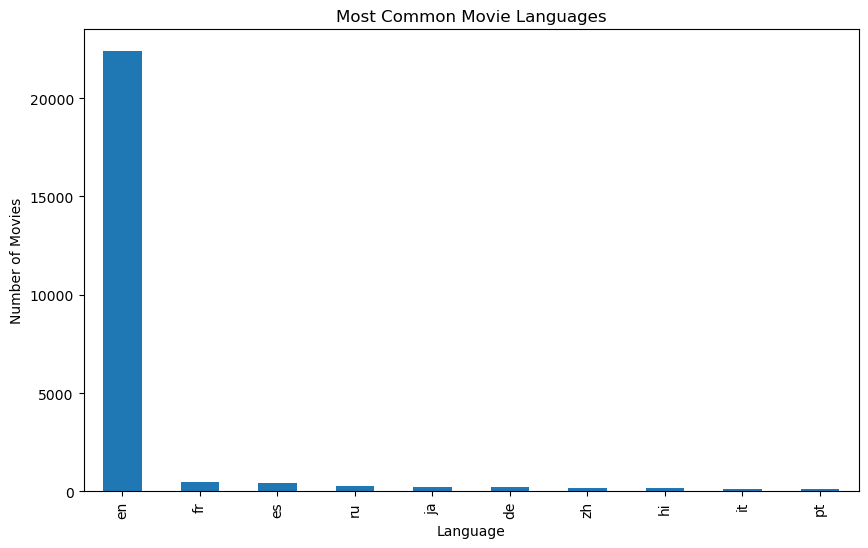

In [190]:
# plotting a bar chart
plt.figure(figsize=(10, 6))
top_10_languages.head(10).plot(kind='bar')

plt.title('Most Common Movie Languages')
plt.xlabel('Language')
plt.ylabel('Number of Movies')

plt.show()


In [191]:
tmd.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19 00:00:00,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26 00:00:00,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07 00:00:00,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22 00:00:00,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16 00:00:00,Inception,8.3,22186


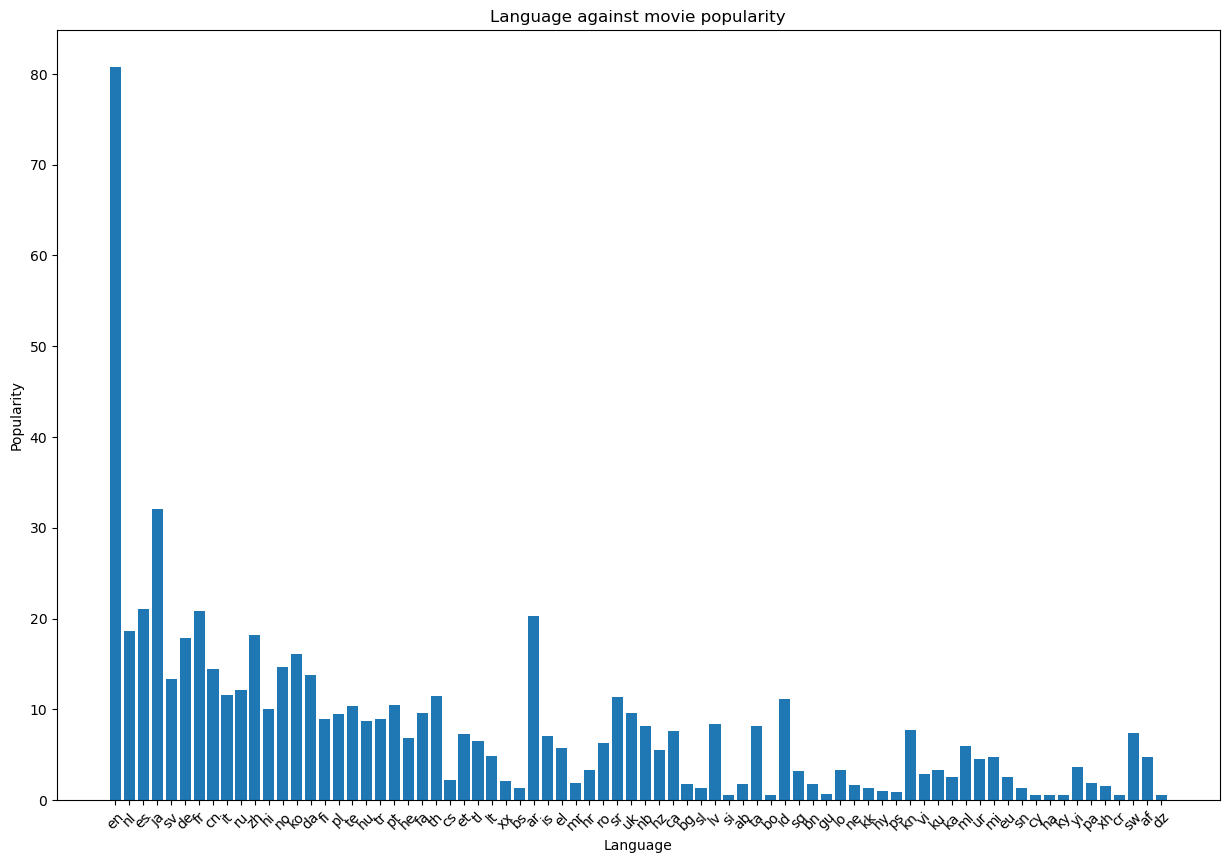

In [192]:
# plotting a bargraph
plt.figure(figsize=(15, 10))

# Plot the bar chart
plt.bar(tmd['original_language'], tmd['popularity'])

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Popularity')
plt.title('Language against movie popularity')

plt.xticks(rotation=45)
plt.show()

The first chart illustrates the distribution of movies across various languages(Considered the top 10 languages).
English is by far the most common language in which movies are produced. The other languages, have significantly fewer movies associated with them.
The second chart illustrates the different languages and the degree of their popularity. English directed and spoken films are the most popular as per the dataset.
Hence, our conclusion is that English dominates the film industry, serving as the primary language for a large majority of movies.
The substantial number of English-language movies suggests the global influence and reach of English-speaking cinema.


# 2. Does the average vote affect popularity?

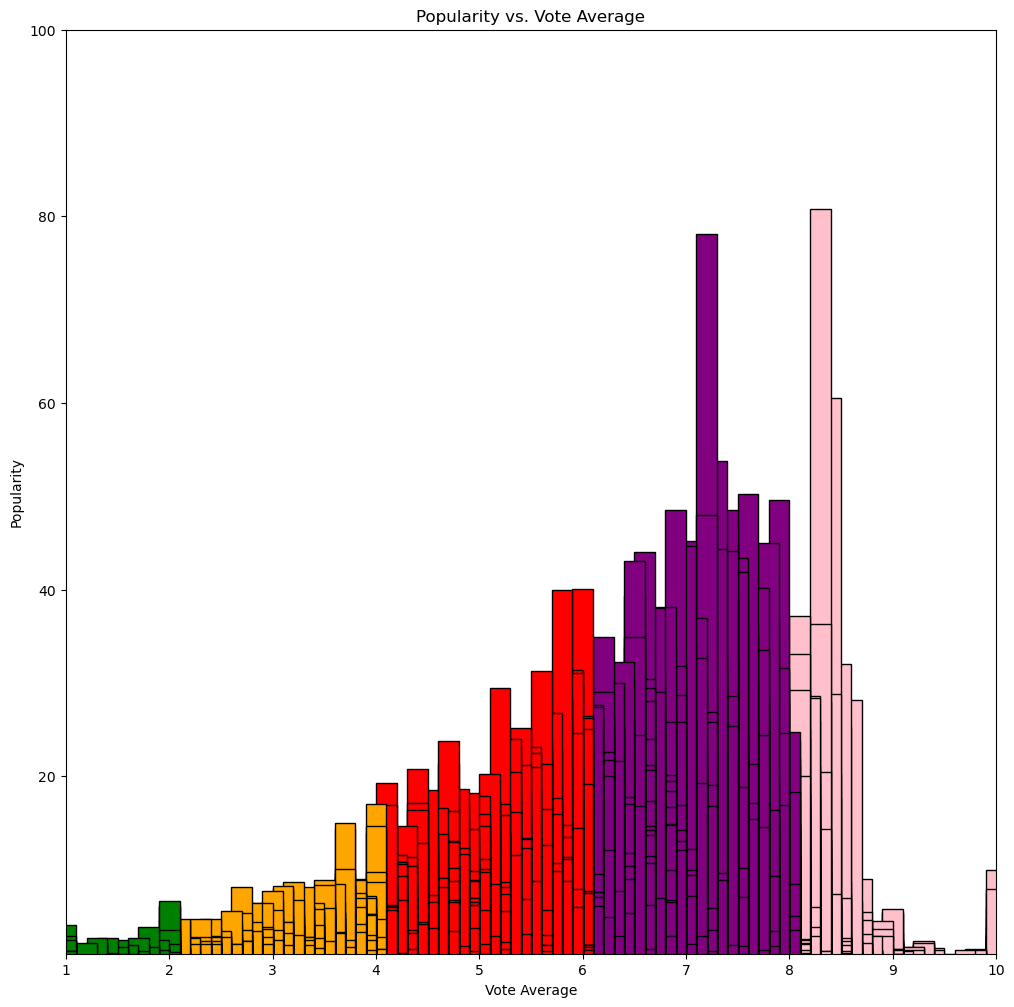

In [193]:
#Plot
sorted_data = tmd.sort_values(by='vote_average', ascending=False)

vote_average = sorted_data['vote_average']
popularity = sorted_data['popularity']
#vote_average = df_tmdb['vote_average']
#popularity = df_tmdb['popularity']

# Set labels and title
plt.figure(figsize=(12, 12))
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Popularity vs. Vote Average')

# Set axis scaling and limits
plt.xscale('linear') 
plt.yscale('linear')  
plt.xlim(1, 10) 
plt.ylim(1, 100) 

# Create the bar graph
for i in range(len(vote_average)):
    x = vote_average.iloc[i]
    y = popularity.iloc[i]
    bar_width = 0.2
    color = 'blue'  # Default color
    
    # Change color based on vote average interval
    if 0 <= x <= 2:
        color = 'green'
    elif 2 < x <= 4:
        color = 'orange'
    elif 4 < x <= 6:
        color = 'red'
    elif 6 < x <= 8:
        color = 'purple'
    elif 8 < x <= 10:
        color = 'pink'
    
    plt.bar(x, y, width=bar_width, color=color, edgecolor='black')

# Show the plot
plt.grid(False)
plt.show()

The data seems to be overlapping as we are dealing with a huge set of data and there is similarity in terms of vote count. Other than that, we can see a not so positive but positive correlation. Movies with an average vote between 5.5 and 8.5 tend to be more popular, more like they have a niche genre or a specific target audience. Additionally, popularity is not the same as quality in that a movie can be popular but it doesn't necessarily mean it is a better movie.

# 3. Do higher budget movies return higher gross earnings?

In [194]:
#Creating a copy of the original df
earnings = merged_bomtmd.copy()
earnings

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...
1264,Destroyer,Annapurna,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$1,533,324","$3,681,096"
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$4,286,367","$6,089,100"
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$490,973","$648,599"
1267,Mandy,RLJ,[18],en,0.600,3.5,2,"$6,000,000","$1,214,525","$1,427,656"


In [195]:
# replacing currency and commas in worldwide gross and domestic gross
earnings['domestic_gross'] = earnings['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
earnings['worldwide_gross'] = earnings['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
earnings

,title,studio,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000",415004880.0,1.068880e+09
1,Inception,WB,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000",292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000",238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000",300531751.0,7.061028e+08
4,Iron Man 2,Par.,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000",312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...
1264,Destroyer,Annapurna,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000",1533324.0,3.681096e+06
1265,Gotti,VE,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000",4286367.0,6.089100e+06
1266,Bilal: A New Breed of Hero,VE,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000",490973.0,6.485990e+05
1267,Mandy,RLJ,[18],en,0.600,3.5,2,"$6,000,000",1214525.0,1.427656e+06


In [196]:
# Specifying the list of column names to select
new_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Creating a new DataFrame with only the selected columns
new_earnings = earnings[new_columns]
new_earnings.head()

,production_budget,domestic_gross,worldwide_gross
0,"$200,000,000",415004880.0,1.068880e+09
1,"$160,000,000",292576195.0,8.355246e+08
2,"$165,000,000",238736787.0,7.562447e+08
3,"$68,000,000",300531751.0,7.061028e+08
4,"$170,000,000",312433331.0,6.211564e+08


In [197]:
new_earnings['production_budget'] = new_earnings['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
new_earnings

C:\Users\Michelle\AppData\Local\Temp\ipykernel_53892\2288695202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_earnings['production_budget'] = new_earnings['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)


,production_budget,domestic_gross,worldwide_gross
0,200000000.0,415004880.0,1.068880e+09
1,160000000.0,292576195.0,8.355246e+08
2,165000000.0,238736787.0,7.562447e+08
3,68000000.0,300531751.0,7.061028e+08
4,170000000.0,312433331.0,6.211564e+08
...,...,...,...
1264,9000000.0,1533324.0,3.681096e+06
1265,10000000.0,4286367.0,6.089100e+06
1266,30000000.0,490973.0,6.485990e+05
1267,6000000.0,1214525.0,1.427656e+06


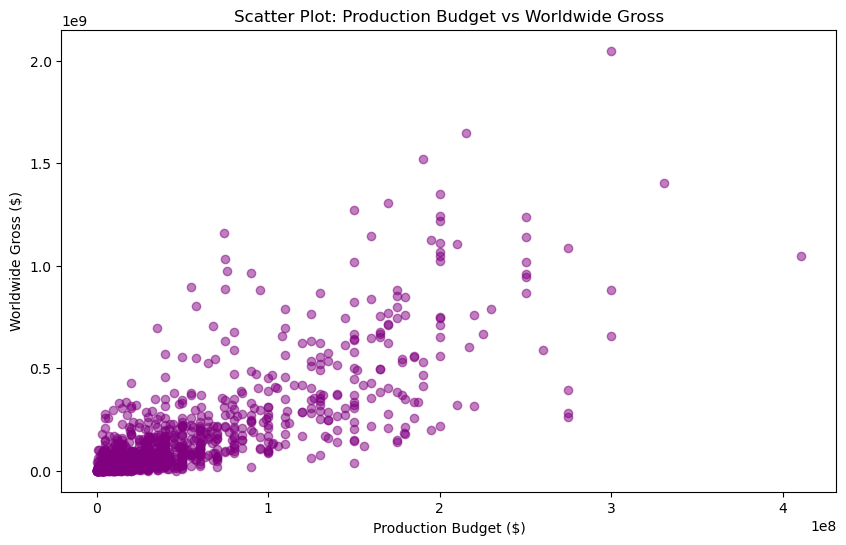

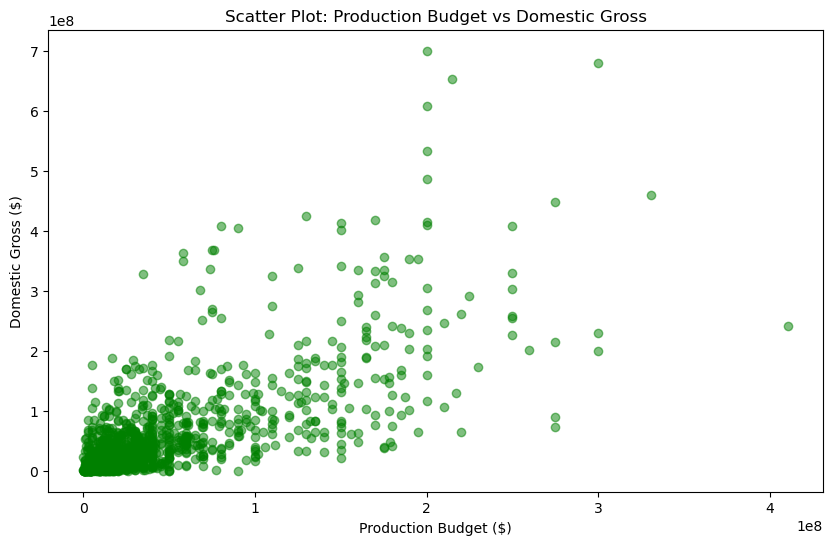

In [198]:
# Creating a scatter plot for 'Production Budget' vs 'Worldwide Gross'
plt.figure(figsize=(10, 6))
plt.scatter(new_earnings['production_budget'], new_earnings['worldwide_gross'], alpha=0.5, color='purple')
plt.title('Scatter Plot: Production Budget vs Worldwide Gross')

plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

plt.show()


# Creating a scatter plot for 'Production Budget' vs 'Domestic Gross'
plt.figure(figsize=(10, 6))
plt.scatter(new_earnings['production_budget'], new_earnings['domestic_gross'], alpha=0.5, color='green')
plt.title('Scatter Plot: Production Budget vs Domestic Gross')

plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')

plt.show()


These plots illustrate the relationship between production budgets and movie earnings, both domestically and worldwide.
In both plots, there is a concentration of movies with low budgets and correspondingly lower gross earnings.
However, movies with medium or higher budgets are spread out more evenly across different levels of gross earnings.
Some high-budget movies have achieved high gross earnings, while others have only reached average or lower gross figures.
The data suggests that a significant portion of movies operates within limited budgets, and their earnings tend to align with their budget levels.

# Recommendations
1. Look at reviews as they shed light on aspects like storytelling, acting, directing, or unique elements that resonated with critics.
2. Focus on story and execution as they are more crucial for a movie's success than just a high budget.
3. Consider the genre and target audience. 
4. Find the right balance between artistic vision and commercial viablity.Also explore niche markets. 
5. If a specific language consistently shows higher popularity, consider prioritizing co-productions or films in that language. For example english.